In [2]:
library(tidyverse)
theme_set(theme_classic())
options(repr.plot.width  = 10, repr.plot.height = 6)
set.seed(1)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 10: Survival Analysis

Survival analysis is a branch of statistics that studies the occurrence and timing of random events.
- How long until the patient relapses?
- How long until the hard drive fails?
- How long until the next earthquake in CA?

In [173]:
## Example dataset
library(survival)
help(lung)

In [3]:
# lung data

lung %>% head

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,306,2,74,1,1,90,100,1175,NA
2,3,455,2,68,1,0,90,90,1225,15
3,3,1010,1,56,1,0,90,90,NA,15
4,5,210,2,57,1,1,90,60,1150,11
5,1,883,2,60,1,0,100,90,NA,0
6,12,1022,1,74,1,1,50,80,513,0


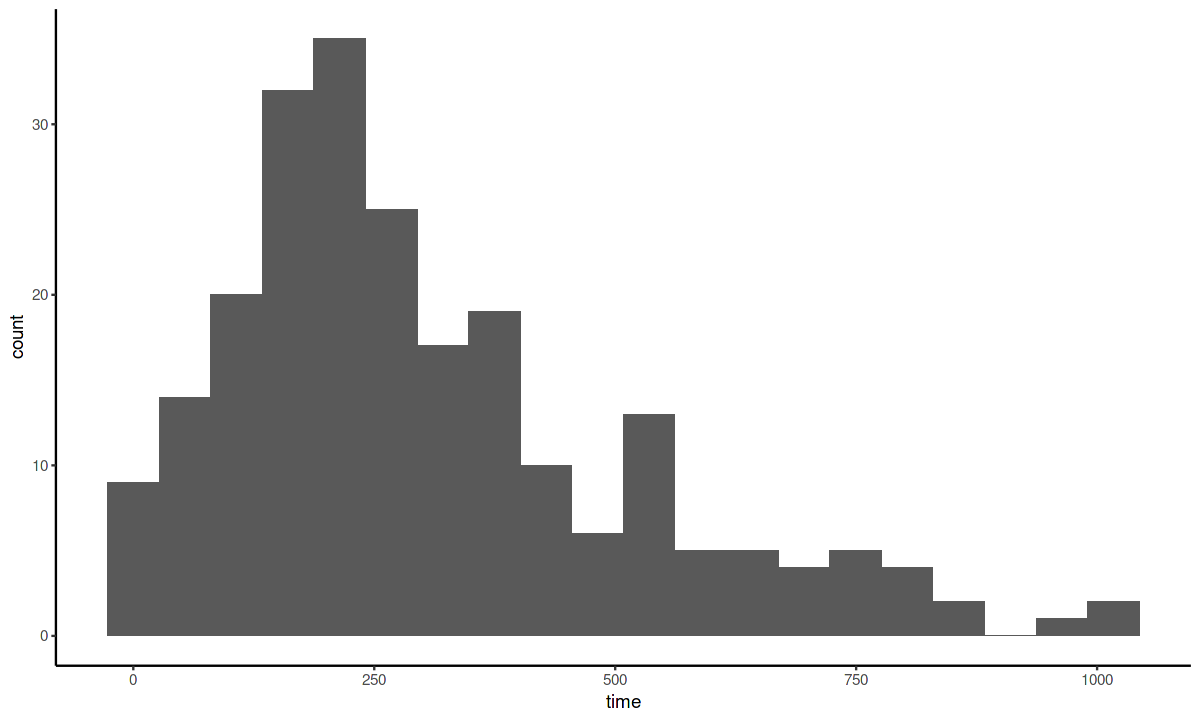

In [4]:
lung %>% as_tibble %>% ggplot(aes(x = time)) + geom_histogram(bins=20)

Does this reflect the actual distribution of survival time given that you have lung cancer? Not exactly, because some people were still alive when the study terminated. In fact, the person with the longest lifespan in the whole dataset is one of them:

In [5]:
lung[which.max(lung$time), ]

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,12,1022,1,74,1,1,50,80,513,0


### Survival curve

A basic question we can ask is:

> Given that I have lung cancer, what is the probability that I survive at least $t$ more days?

The quantity that answers this is the **survival function**

$$S(t) = \mathbb{P}(T > t) = 1 - F(t)$$

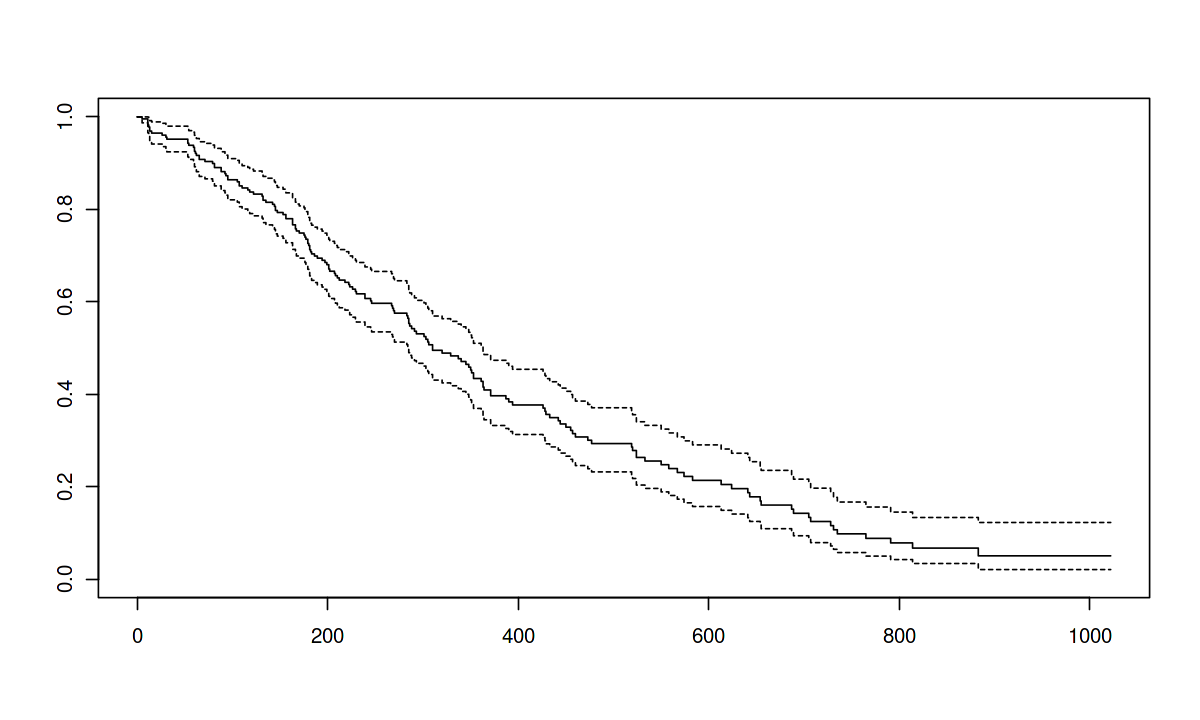

In [6]:
library(survival)
lung <- lung %>% 
  mutate(
    status = recode(status, `1` = 0, `2` = 1)
  ) # 0 = censored, 1 = dead 
lung %>% survfit(Surv(time, status) ~ 1, data = .) %>% 
  plot

### Hazard rate
Another question we can ask is: what is my "instantaneous" risk of dying right now, given that I've survived to time $t$? The quantity that answers this is the **hazard rate function**

$$h(t)=\lim_{\Delta t\to 0} \frac{\mathbb{P}(t \le T < t + \Delta t\mid T>t)}{\Delta t}$$

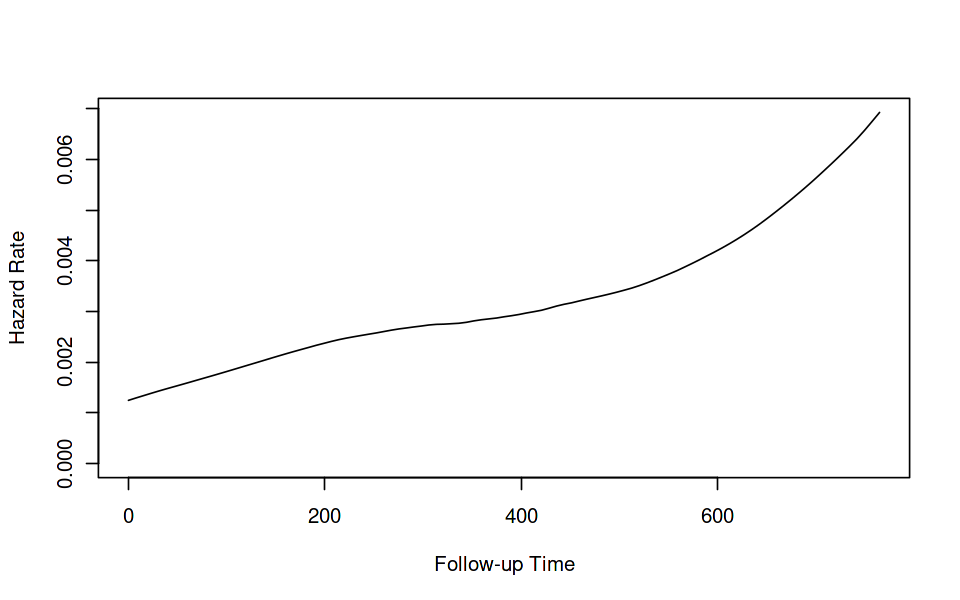

In [174]:
library(muhaz)
mod.lung <- muhaz(lung$time, lung$status) # 1 = failure, 0 = censored
plot(mod.lung)

### BHHT data

The [Brief History of Human Time](https://medialab.github.io/bhht-datascape/) is a database about the lives of ~2.2 million noteworthy individuals who have lived over the past ~5000 years.

(A reduced version containing 10,000 randomly sampled rows is posted to the Github.)

In [8]:
u <- 'https://github.com/terhorst/stats504/raw/main/lectures/week10/bhht_small.csv.gz'
bhht <- read_csv(u)
bhht %>% head

Rows: 10000 Columns: 49
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (25): wikidata_code, approx_birth, approx_death, gender, level1_main_occ...
dbl (24): birth, death, updated_death_date, birth_min, birth_max, death_min,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


wikidata_code,birth,death,updated_death_date,approx_birth,approx_death,birth_min,birth_max,death_min,death_max,⋯,area2_of_rattachment,list_wikipedia_editions,un_region,group_wikipedia_editions,bplo1,dplo1,bpla1,dpla1,pantheon_1,level3_all_occ
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Q466886,1549,1614,NA,NA,NA,1549,1549,1614,1614,⋯,Missing,dewiki|plwiki|frwiki|svwiki|nlwiki|enwiki,Europe,grA,15.535887,14.55167,51.56427,52.34195,0,D:_theologian_writer_academic_P:_theologian_poet_theologian_English_ poète_théologien_French_theologe_dichter_German_rektor_teolog_professor_Swedish
Q16066925,1878,1924,NA,NA,NA,1878,1878,1924,1924,⋯,Missing,enwiki,Oceania,grA,144.455002,144.99899,-37.24700,-37.78900,0,D:_football_P:_pharmacist_football_club_English
Q2072123,1927,2019,NA,NA,NA,1927,1927,2019,2019,⋯,Missing,jawiki|ruwiki|frwiki|enwiki|dewiki|itwiki,America,grA,-87.493103,-74.00000,41.61110,40.70000,0,D:_violin_P:_violin_English_violoniste_French_violinista_insegnante_Italian_geige_musik_pädagoge_German
Q2562298,1949,NA,NA,NA,NA,1949,1949,NA,NA,⋯,Missing,dewiki,Europe,grB,NA,NA,NA,NA,0,D:_football_P:_fußball_mittelfeldspieler_German
Q2953289,1969,NA,NA,NA,NA,1969,1969,NA,NA,⋯,Missing,nlwiki|frwiki|enwiki|fawiki,Europe,grA,9.883333,NA,45.51972,NA,0,D:_sport_P:_racing_cyclist_racing_English_ coureur_coureur_cycliste_French
Q67442,1829,1857,NA,NA,NA,1829,1829,1857,1857,⋯,Missing,dewiki|jawiki|bgwiki|ruwiki|enwiki|eswiki|nlwiki,Europe,grA,11.575000,75.98333,48.13750,39.45000,0,D:_geologist_explorer_botanist_P:_botanist_explorer_author_English_entdecker_German_botánic_geográfic_explorador_Spanish


In [15]:
bhht <- read_csv("cross-verified-database.csv.gz")

Rows: 2291817 Columns: 49
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (25): wikidata_code, approx_birth, approx_death, gender, level1_main_occ...
dbl (24): birth, death, updated_death_date, birth_min, birth_max, death_min,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [198]:
bhht %>% colnames

[1] "wikidata_code"            "birth"                   
 [3] "death"                    "updated_death_date"      
 [5] "approx_birth"             "approx_death"            
 [7] "birth_min"                "birth_max"               
 [9] "death_min"                "death_max"               
[11] "gender"                   "level1_main_occ"         
[13] "name"                     "un_subregion"            
[15] "birth_estimation"         "death_estimation"        
[17] "bigperiod_birth_graph_b"  "bigperiod_death_graph_b" 
[19] "curid"                    "level2_main_occ"         
[21] "freq_main_occ"            "freq_second_occ"         
[23] "level2_second_occ"        "level3_main_occ"         
[25] "bigperiod_birth"          "bigperiod_death"         
[27] "wiki_readers_2015_2018"   "non_missing_score"       
[29] "total_count_words_b"      "number_wiki_editions"    
[31] "total_noccur_links_b"     "sum_visib_ln_5criteria"  
[33] "ranking_visib_5criteria"  "all_geography_groups"    
[35] "string_citizenship_raw_d" "citizenship_1_b"         
[37] "citizenship_2_b"          "list_areas_of_rattach"   
[39] "area1_of_rattachment"     "area2_of_rattachment"    
[41] "list_wikipedia_editions"  "un_region"               
[43] "group_wikipedia_editions" "bplo1"                   
[45] "dplo1"                    "bpla1"                   
[47] "dpla1"                    "pantheon_1"              
[49] "level3_all_occ"

## Questions

This is an interesting data set and there are many questions we can ask:

1. What's the average lifespan in this dataset?
2. What's the distribution of birth years (by century)?
3. How correlated are a) birth year and b) life span?
4. What covariates do we have? How might those affect lifespan?

In [36]:
bhht %>% mutate(lspan = death - birth) %>% 
    lm(lspan ~ birth * un_region, data = .) %>%
    summary


Call:
lm(formula = lspan ~ birth * un_region, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.616  -8.995   3.097  11.941  51.228 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             45.957257   9.806660   4.686 2.87e-06 ***
birth                    0.007634   0.005265   1.450   0.1471    
un_regionAmerica        15.338034  20.095347   0.763   0.4453    
un_regionAsia           -5.907572  11.057406  -0.534   0.5932    
un_regionEurope        -10.985980  10.340784  -1.062   0.2881    
un_regionOceania        77.789877  67.192402   1.158   0.2470    
birth:un_regionAmerica  -0.002555   0.010686  -0.239   0.8111    
birth:un_regionAsia      0.007483   0.005970   1.253   0.2101    
birth:un_regionEurope    0.011355   0.005560   2.042   0.0412 *  
birth:un_regionOceania  -0.035075   0.035489  -0.988   0.3230    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.62 on 4306 d

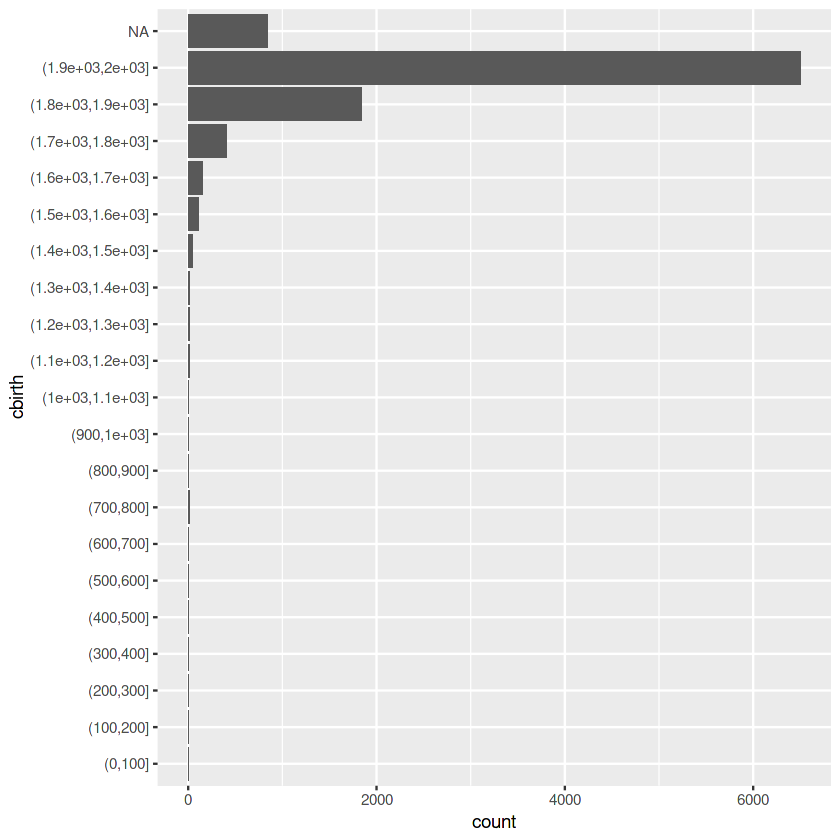

In [37]:
bhht %>% mutate(cbirth = cut(birth, seq(0, 2000, 100))) %>% 
    ggplot(aes(x = cbirth)) + geom_bar() + 
    coord_flip()

In [9]:
bhht %>% mutate(lspan = death - birth) %>% lm(lspan ~ birth, data = .) %>% summary 


Call:
lm(formula = lspan ~ birth, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.597  -9.039   3.202  11.998  49.238 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.703819   2.547328   14.41   <2e-16 ***
birth        0.017925   0.001378   13.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.71 on 4413 degrees of freedom
  (5585 observations deleted due to missingness)
Multiple R-squared:  0.03691,	Adjusted R-squared:  0.03669 
F-statistic: 169.1 on 1 and 4413 DF,  p-value: < 2.2e-16


### Survival data

There are two basic features of survival data:

- **Time to Event**: The primary variable of interest, representing the time until the occurrence of a specific event.
- **Event Indicator**: A binary variable indicating whether the event of interest (e.g., failure, death) has occurred (1) or not (0).

This data is typically collected over a study period, with observations on individuals starting from a defined starting point until the occurrence of the event or the end of the study period.


### Censoring

A defining feature of survival data that makes its analysis different from other types of data is that it is usually *censored*:
- The event of interest may not have observed for some subjects during the study period for various reasons.
- Example: what is the lifespan of everyone born in 1940?
    - We only know it definitively for those who have already passed away.
    - For everyone else, we only know that their lifespan is _at least_ 84 years.
- Simply treating the observed lifespans like they are a random sample from the "lifespan distribution" is wrong if there is censoring.

### Censoring
Three types of censoring:    
- **Right Censoring**: The most common form, where the event has not occurred by the end of the study or the individual is lost to follow-up. We know only that the event time is greater than a certain value.
- **Left Censoring**: The event occurred before the individual entered the study, so the exact time is unknown but less than a certain value.
- **Interval Censoring**: The exact time of the event is unknown but falls within a certain interval

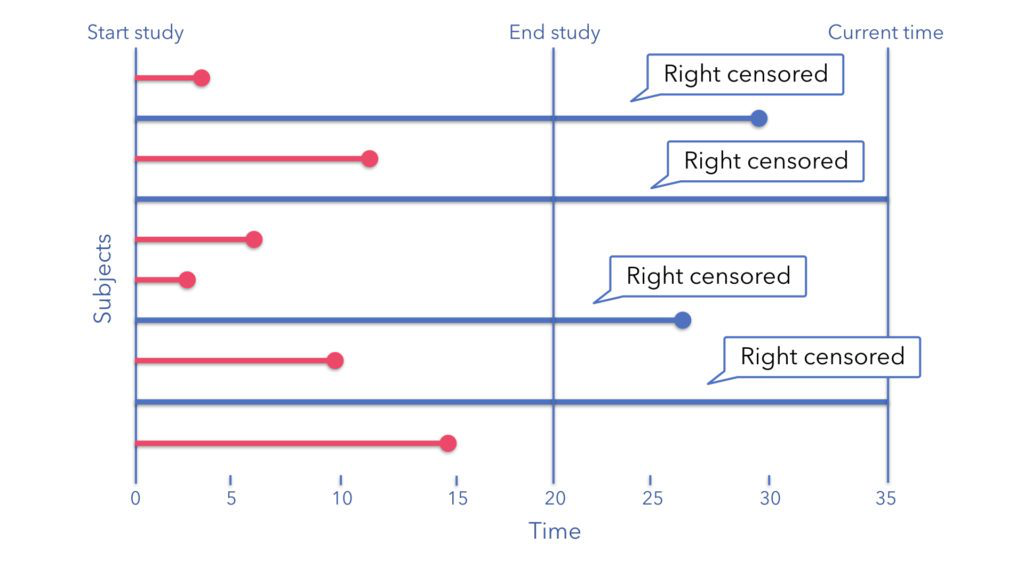

(Source: https://jigso.com/the-notion-of-censoring-in-survival-analysis/)

In [10]:
censor_plot <- function() {
    times = c(1.9,2.2,3.3,.5,1.5,3.5); marked = 1 + (rev(times) > 2.5); col = c("blue","red")[marked]
    barplot(times, width=.01, space=99, ylim=c(1,6), xlim=c(0,4), 
            horiz=TRUE, xlab="Years", ylab="Patient", xaxt = "n", yaxt="n")
    # points(c(1.9,2.2,3.3,.5,1.5,3.5), cex=0.75, pch=19)
    # Now call axis to draw tick marks and labels at 1:3
    axis(2, at = 1:6)
    axis(1, at = 0:4)
    abline(v=2.5)
    points(rev(times), c(6,5,4,3,2,1), 
           pch=c('o','x')[marked],
           col=col)
}

Censoring example:

- Everyone receives heart surgery at time 0 and is tracked for 2.5 years
- Blue 'o' denotes a heart attack observed while on study
- Red 'x' denotes a heart attack that occurs after study conclusion

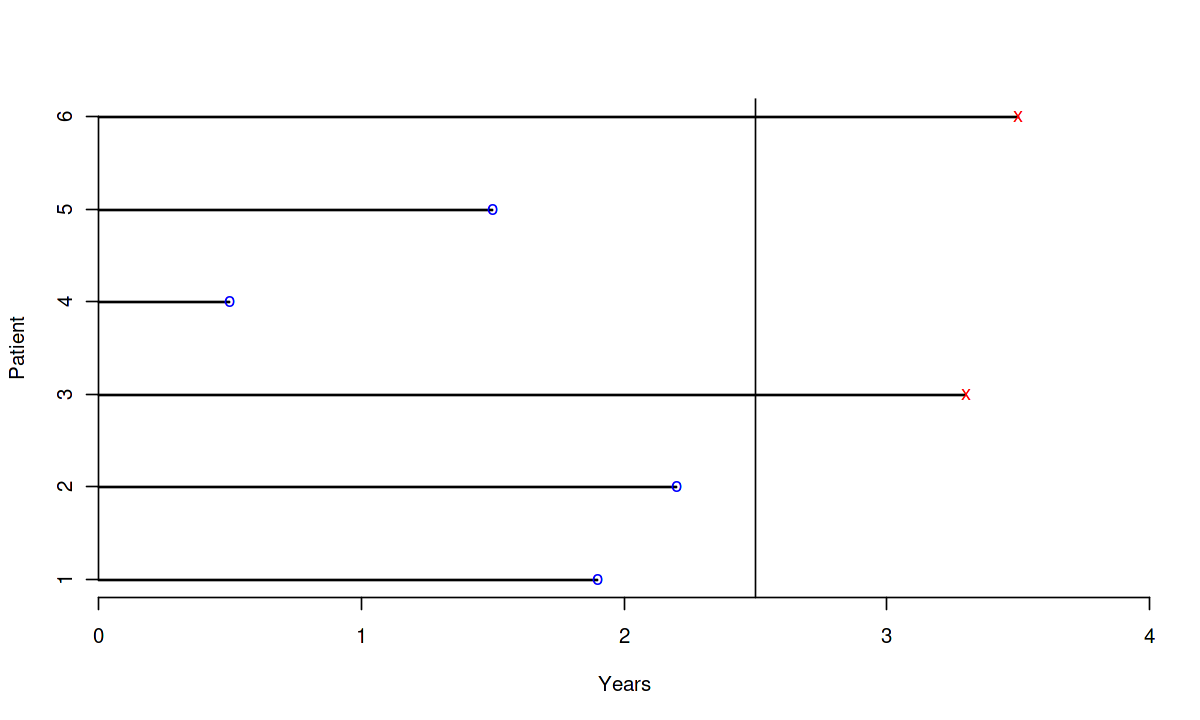

In [11]:
censor_plot()

# Terminology
- Random variable $T$ is the *survival time*
- CDF: $$F(t) = \mathbb{P}(T \le t)$$
- Survival function: $$S(t) = \mathbb{P}(T>t) = 1-F(t)$$
- PDF: $$f_T(t) = F'(t) = -S'(t)$$

### Relationships
- Note that $h(t)$ is a derivative: $$h(t) = \frac{f_T(t)}{S(t)} = -\frac{\mathrm{d}}{\mathrm{d}t}\log S(t)$$
- Hence, 
$$\begin{align*}S(t) &= \exp\left(-\int_0^t h(u)\,\mathrm{d}u\right) \\ 
 f(t) &= -S'(t) = h(t)\exp\left(-\int_0^t h(u)\,\mathrm{d}u\right) \\
H(x) &= -\int^x_0 \mathrm{d} \log S(u) = -\log S(x)
\end{align*}$$
- $\therefore$ distribution of $T$ is completely specified by $h$, $H$, $f$, or $S$

# Survival analysis
- "Survival analysis" = estimating $S(t)$
- With no censoring, $$\hat{S}_{\text{MLE}}(t) = \{\text{proportion of sample who lived longer than $t$}\}$$

## The Kaplan-Meier estimator
The Kaplan-Meier (1958; >50k cites) *product-limit estimator* is $$\hat{S}(t) = \prod_{i:t_i \le t} \left( 1 - \frac{d_j}{n_j} \right)$$

- $t_1, \dots, t_k$: $k$ (distinct event times). 
- $d_i$: # of individuals who die at time $t_i$. 
- $n_i$: # of individuals who at *at risk* (alive and have not been censored) *prior* to time $t_i$



## Intuition
- If $t_{j} \le t < t_{j+1}$ then $$\begin{align*}\mathbb{P}(T>t) &= \mathbb{P}(T>t_j) \\ 
&= \mathbb{P}(T>t_{j} \mid T > T_{j-1}) \mathbb{P}(T > t_{j-1}) \\
&\vdots \\
&= \prod_{i=1}^j \mathbb{P}(T > t_i \mid T > t_{i-1})
\end{align*}$$
- MLE of $\mathbb{P}(T > t_j \mid T > t_{j-1})$ is the proportion of at-risk individuals who survive: $1 - d_j/n_j$

In R the `survival` library can fit a survival curve.

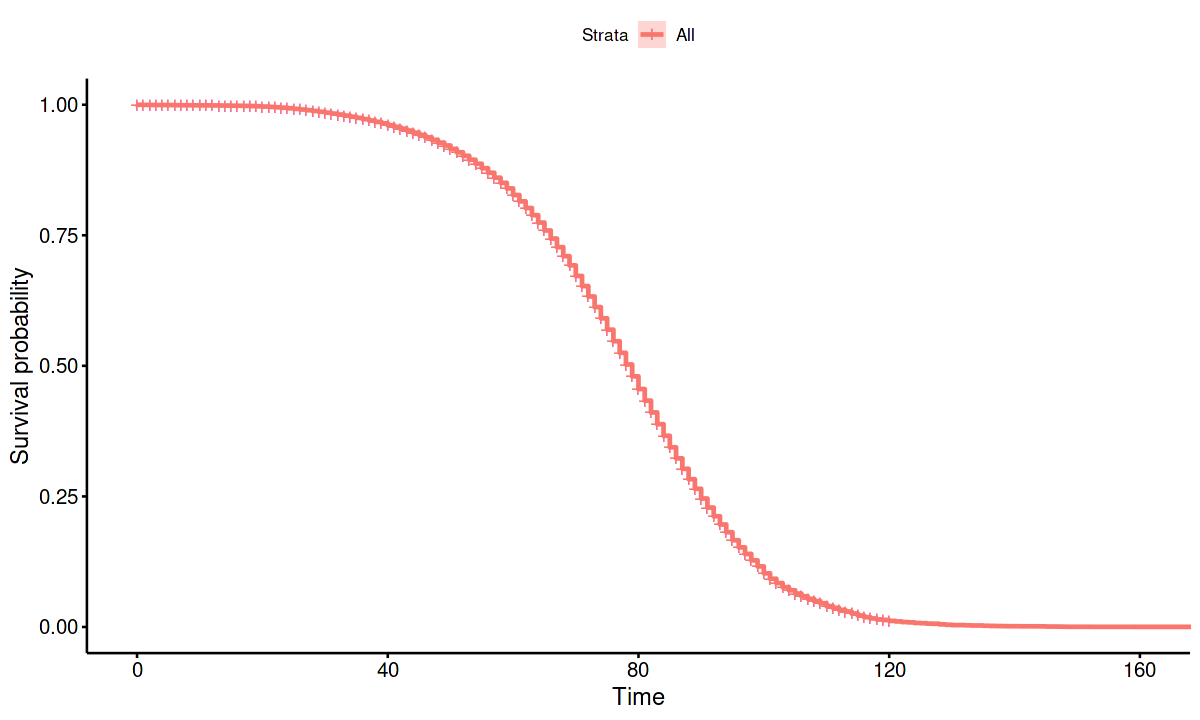

In [43]:
library(survival)
library(survminer)
sdf <- bhht %>% mutate(lspan = death - birth, 
                dead = (birth < 1900) | (is.na(death)))
sfit <- survfit(Surv(lspan, dead) ~ 1, data=sdf)
ggsurvplot(sfit)

### Using covariates

- If you add covariates, it will estimate a separate survival curve for each distinct value. 
- (Only really useful for a small number of categories.)
- Let's estimate the survival curve for each century in the BHHT data:

In [44]:
sdf <- bhht %>% mutate(lspan = death - birth, 
                century = cut(birth, c(-4000, seq(1000, 1900, 100))),
                dead = (birth < 1900) | (is.na(death)))
sfit <- survfit(Surv(lspan, dead) ~ century, data=sdf)

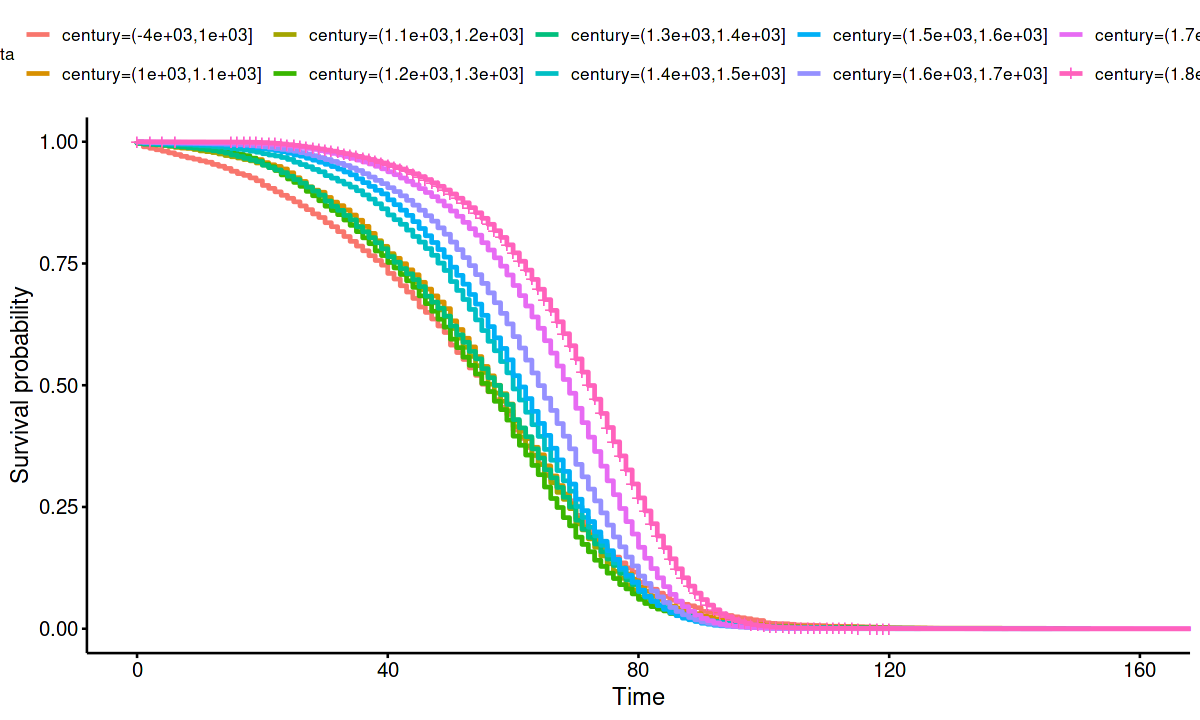

In [56]:
ggsurvplot(sfit)

### Mean residual life
- This answers the question, *given that I have survived to time $x$, what is my expected future life span*
- Mathematically,

\begin{align*}
\operatorname{mrl}(x) &= \mathbb{E}(T-x\mid T>x) \\
&= \int_{x}^\infty (t-x)\,[f(t)/S(x)]\,dt \\
&= -\frac{\int_{x}^\infty (t-x) dS(t)}{S(x)} \\
&= \frac{\int_x^\infty S(t)\,dt}{S(x)}
\end{align*}

Let's plot the mean residual life for each century:

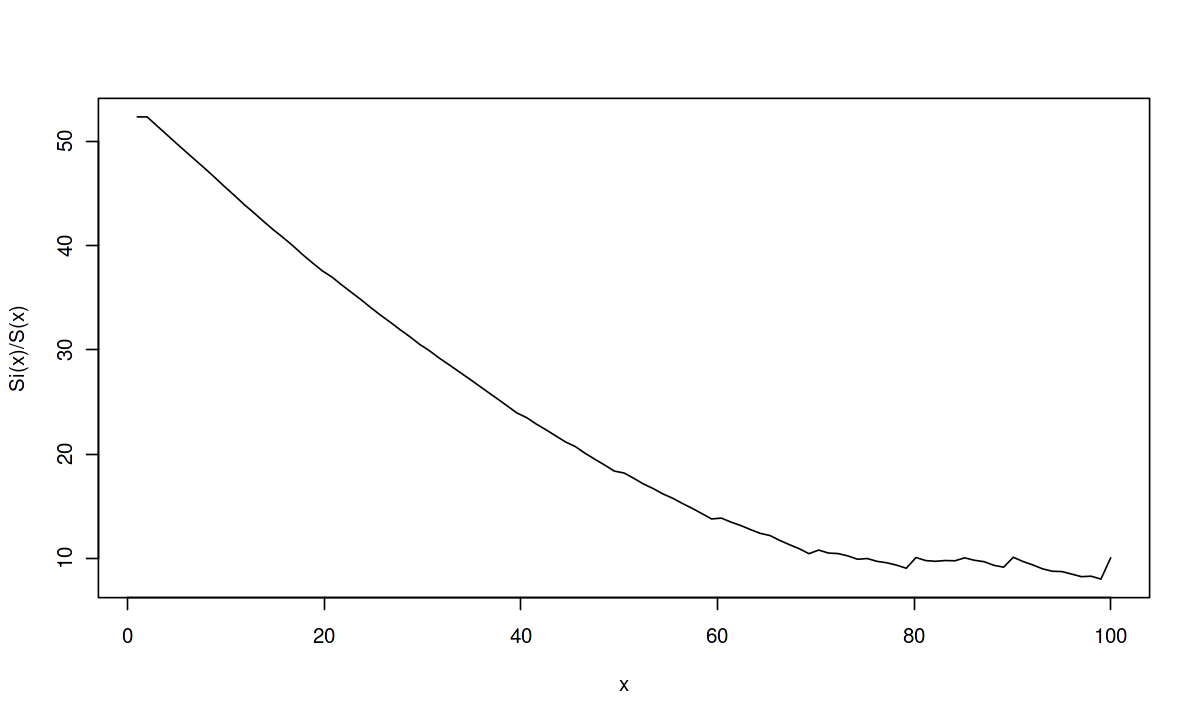

In [85]:
S <- approxfun(sfit$time[1:131], sfit$surv[1:131], "constant")
Si <- approxfun(sfit$time[1:131], sum(sfit$surv[1:131]) - cumsum(sfit$surv[1:131]), "constant")

curve(Si(x) / S(x), from=1, to=100)

### Median survival time
This is simply the median of the survival distribution:

$$x_{1/2} = \inf \{t: S(t)\le 1/2\}$$

This generalizes to other quantiles by setting $0\le p \le 1$ in place of $1/2$ above.

In [ ]:
# Median survival time by century

### Hazard function
- The *hazard function* $h(t)$ is defined as $$h(t)=\lim_{\Delta t\to 0} \frac{\mathbb{P}(t \le T < t + \Delta t\mid T>t)}{\Delta t}$$
- Given that individual has survived to time $t$, the probability of death in the interval $[t, t + \Delta t)$ is  $\approx h(t)\Delta t$ (for small $\Delta t$)
- We are often interested in estimating this quantity.
- The cumulative hazard function $H(x)$ is defined as
$$H(x) = \int_0^x h(t)\,dt$$

## Estimating hazard functions

- The `muhaz` library can estimate the hazard rate function from data.
- In general, estimating the hazard function is harder than estimating the survival curve.

In [ ]:
library(muhaz)
sdfc <- sdf %>% sample_n(100000) %>% select(lspan, dead) %>% filter(complete.cases(.))
bhht.haz <- muhaz(sdfc$lspan, sdfc$dead)
bhht.haz

## Shapes of the hazard function
- Models with increasing hazard rates are more common. Why?
- Can you name a situation where decreasing hazard rate may occur?
- Hump-shaped may occur if there is an initial "danger period", e.g. infancy.
- The hazard function tends to be the most interpretable, so most people prefer it as a way to model survival.

### Example 
$h(t) = \lambda$ for some constant $\lambda>0$. What is the distribution of $T$? (i.e. what is $F(t)$)?

**Solution**. $F(t) = 1 - S(t) =1 -  e^{-\int_0^t \lambda \, \mathrm{d} u} = 1 - e^{-\lambda t}$, so $T \sim \operatorname{Exponential}(\lambda).$

### Exponential survival model
Exponential is the simplest survival model and has some nice properties:
- $\mathbb{P}(X>x+z\mid X>x)=\mathbb{P}(X>z)$  (memoryless)
  - Hence $\operatorname{mrl}(x)=1/\lambda$.
- Quantiles: $x_p=\log(1-p)/\lambda$.
  - Hence: $x_{1/2} = -\log(2)/\lambda$.
- $H(x) = -\log S(x) = \lambda x$. 
    - This can be used to check goodness of fit. 
    - Plot $\log \hat{S}(x)$ against $x$ and assess linearity.

### Example 2
The Weibull distribution with parameters $\alpha,\lambda > 0$ has pdf 

$$f_T(t) = \alpha\lambda(\lambda t)^{\alpha-1}\exp\left[-(t\lambda)^\alpha\right],\,t\ge 0.$$

**Challenge**: quickly guess the hazard function $h(t)$.

**Solution**. If $H(t) = \left(\lambda t\right)^{\alpha}$ then $$f_T(t) = H'(t) e^{-[H(t)-H(0)]} \mathrm{d}u.$$ Hence $$h(t) = H'(t)= \alpha\lambda(\lambda t)^{\alpha-1}.$$

- The Weibull distribution is common in survival analysis because it lets us control the shape of the hazard function while still being reasonably easy to work with. 
- Also, if $X\sim\operatorname{Weibull}(\alpha,\beta)$ then $$\log X = \mu + \sigma E$$ where $\mu=(\log \beta)/\alpha$, $\sigma=1/\alpha$ and $E\sim \operatorname{Gumbel}(0,1)$.
- Since $\log H(t) = \alpha (\log t - \log \beta)$, this can again be used to check for goodness of fit.

Weibull survival function:

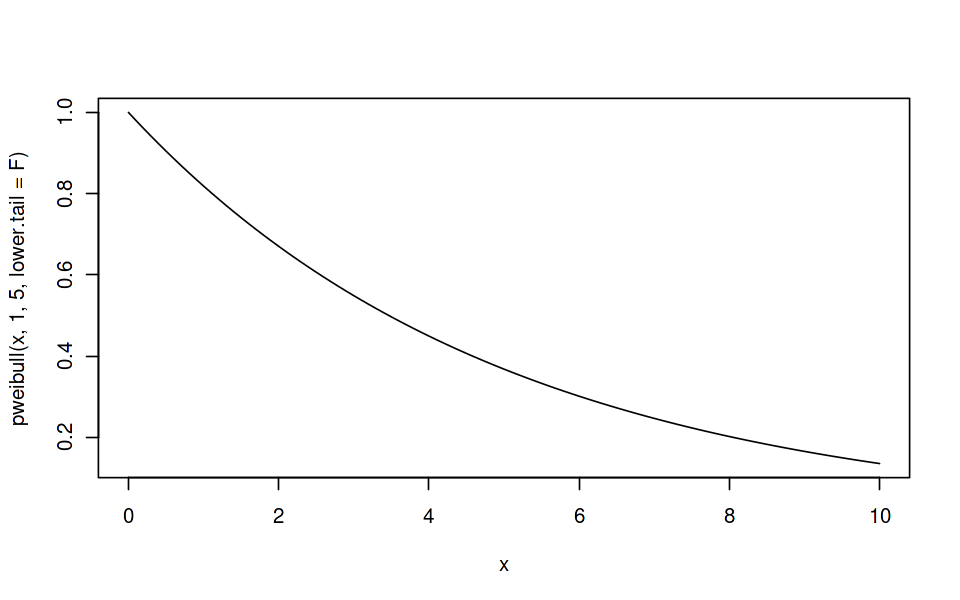

In [12]:
curve(pweibull(x, 1, 5, lower.tail = F), from=0, to=10)

Weibull hazard function:

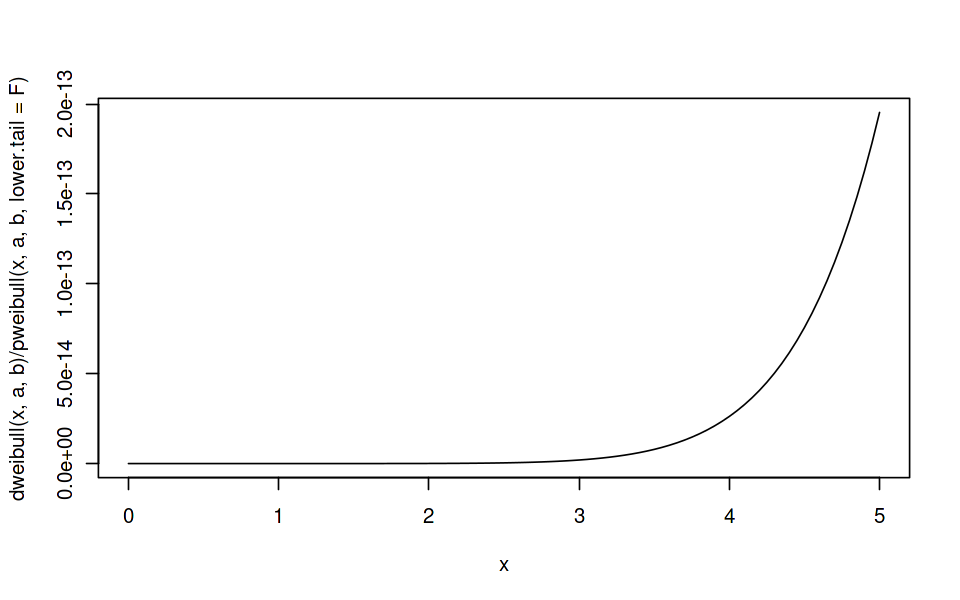

In [208]:
a=10;b=100; 
curve(dweibull(x, a, b) / pweibull(x, a, b, lower.tail = F), from=0, to=5)